# InspireScraper Notebook

This notebook is used for scraping academic paper information from INSPIRE-HEP.

In [1]:
# Import necessary libraries and functions

from src.imports import *
from src.utils import scrape_all_pages, fetch_abstract, get_total_pages_from_inspire, add_abstracts

## Initialize WebDriver

Here we initialize the WebDriver for Selenium.

In [2]:
driver = webdriver.Safari()  # Or whichever driver you're using

## Scrape Data from INSPIRE-HEP

Define the base URL and total number of pages to scrape.

In [3]:
url = "https://inspirehep.net/literature?sort=mostrecent&size=250&page=1&q=a%20quevedo&ui-citation-summary=true"
total_pages = get_total_pages_from_inspire(driver, url)  # Replace with the actual number of pages
df = scrape_all_pages(driver, url, total_pages)

https://inspirehep.net/literature?sort=mostrecent&size=250&q=a%20quevedo&ui-citation-summary=true


In [4]:
df.head()

,Title,Authors,ePrint Number,arXiv Category,DOI,Citation Count
0,String Thermodynamics In and Out of Equilibrium: Boltzmann Equations and Random Walks,"Andrew R. Frey, Ratul Mahanta, Anshuman Maharana, Francesco Muia, Fernando Quevedo",2310.11494,hep-th,None,0
1,Testing BSM physics with gravitational waves,"Francesco Muia, Fernando Quevedo, Andreas Schachner, Gonzalo Villa",2303.01548,hep-ph,10.1088/1475-7516/2023/09/006,5
2,The Fermilab RFQ Project,"D. Neuffer, C.D. Curtis, F.R. Huson, Q.A. Kerns, A. Martinez",None,None,10.1109/TNS.1983.4336714,1
3,A Sensitive Telescope for Low-Energy Gamma-Ray Astronomy.,"D. Maccagni, C. Paizis, F. Perotti, R. Stiglitz, G. Villa",None,None,None,0


## Add abstracts

In this part we add abstracts to the dataframe. Be aware that this might be time-consuming.

In [5]:
df_abs = add_abstracts(df)

In [6]:
df_abs

,Title,Authors,ePrint Number,arXiv Category,DOI,Citation Count,Abstract
0,String Thermodynamics In and Out of Equilibrium: Boltzmann Equations and Random Walks,"Andrew R. Frey, Ratul Mahanta, Anshuman Maharana, Francesco Muia, Fernando Quevedo",2310.11494,hep-th,None,0,"We revisit the study of string theory close to the Hagedorn temperature with the aim towards cosmological applications. We consider interactions of open and closed strings in a gas of D$p-$branes, and/or one isolated D$p$-brane, in an arbitrary number $d$ of flat non-compact dimensions and general compact dimensions. Leading order string perturbation theory is used to obtain the basic interaction rates in a flat background, which are shown to be consistent with the random walk picture of highly excited strings that should apply in more general backgrounds. Using the random walk interpretation we infer the structure of more general semi-inclusive string scattering rates and then write down the corresponding Boltzmann equations describing ensembles of highly excited closed and open strings. We organise the interaction terms in Boltzmann equations so that detailed balance becomes manifest. We obtain the equilibrium solutions and show that they reduce to previously computed solutions for $d=0$. We further study the behaviour of non-equlibrium fluctuations and find explicit analytic expressions for the equilibration rates (and for the number of open strings in $d=0$). Potential implications for an early universe with strings at high temperatures are outlined."
1,Testing BSM physics with gravitational waves,"Francesco Muia, Fernando Quevedo, Andreas Schachner, Gonzalo Villa",2303.01548,hep-ph,10.1088/1475-7516/2023/09/006,5,"The Cosmic Gravitational Wave Background (CGWB) is an irreducible background of gravitational waves generated by particle exchange in the early Universe plasma. Standard Model particles contribute to such a stochastic background with a peak at $f\sim 80$ GHz. Any physics beyond the Standard Model (BSM) may modify the CGWB spectrum, making it a potential testing ground for BSM physics. We consider the impact of general BSM scenarios on the CGWB, including an arbitrary number of hidden sectors. We find that the largest amplitude of the CGWB comes from the sector that dominates the energy density after reheating and confirm the dominance of the SM for standard cosmological histories. For non-standard cosmological histories, such as those with a stiff equation of state $\omega >1/3$, like in kination, BSM physics may dominate and modify the spectrum substantially. We conclude that, if the CGWB is detected at lower frequencies and amplitudes compared to that of the SM, it will hint at extra massive degrees of freedom or hidden sectors. If it is instead measured at higher values, it will imply a period with $\omega >1/3$. We argue that for scenarios with periods of kination in the early Universe, a significant fraction of the parameter space can be ruled out from dark radiation bounds at BBN."
2,The Fermilab RFQ Project,"D. Neuffer, C.D. Curtis, F.R. Huson, Q.A. Kerns, A. Martinez",None,None,10.1109/TNS.1983.4336714,1,Abstract not found
3,A Sensitive Telescope for Low-Energy Gamma-Ray Astronomy.,"D. Maccagni, C. Paizis, F. Perotti, R. Stiglitz, G. Villa",None,None,None,0,Abstract not found


# Produce basic plots

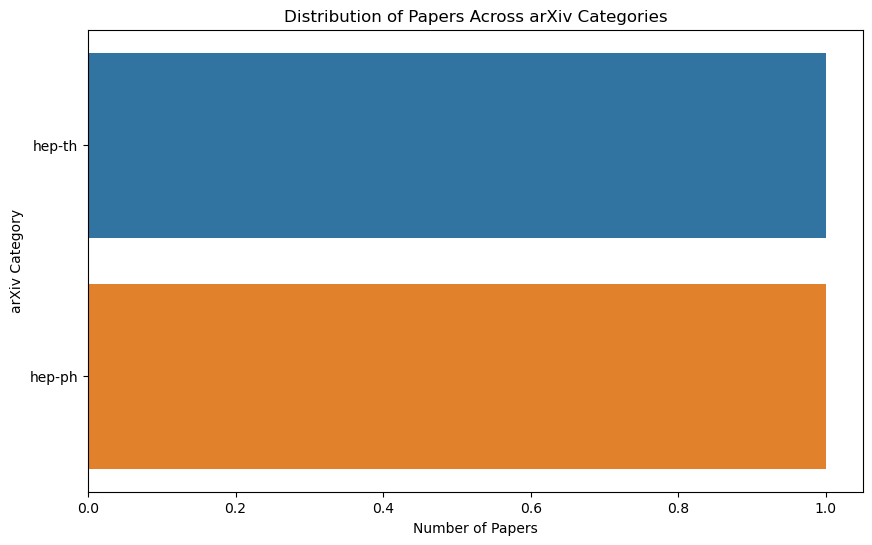

In [7]:
from src.utils import plot_arxiv_category_distribution
plot_arxiv_category_distribution(df)

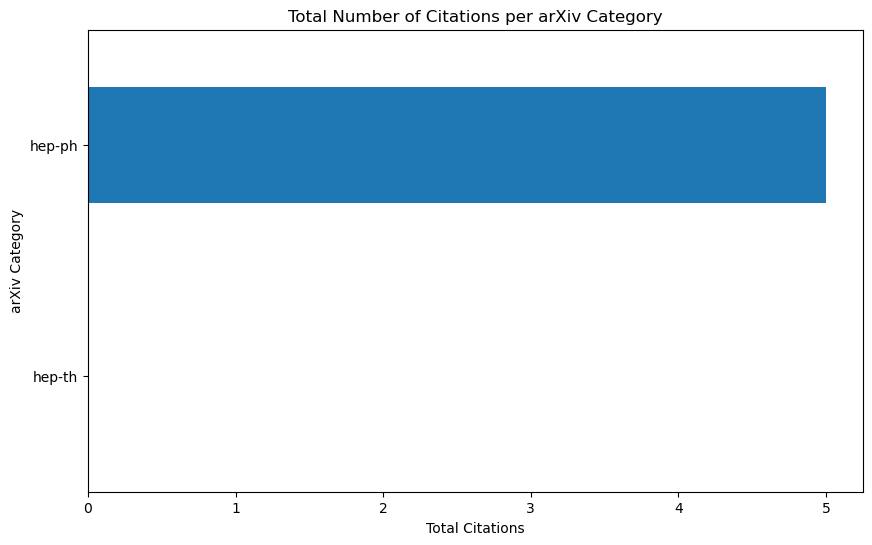

In [8]:
from src.utils import plot_citations_per_category
plot_citations_per_category(df)

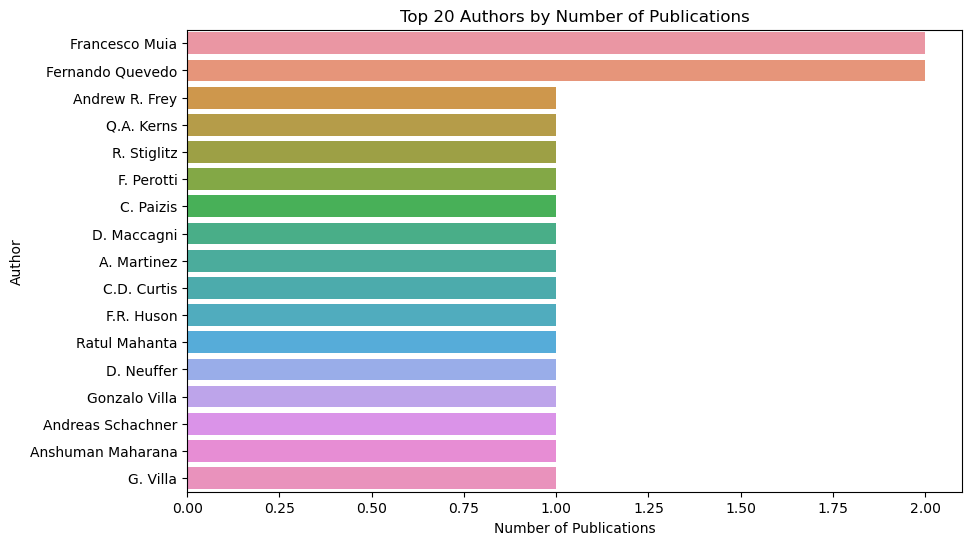

In [9]:
from src.utils import plot_pareto_authors
plot_pareto_authors(df)